### Importing basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as ms

### Importing the dataset 

In [2]:
data = pd.read_csv('insurance.csv')

### Analyze data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
data.shape

(1338, 7)

### Visualize the data

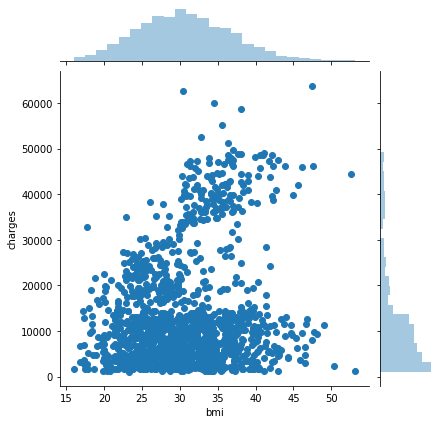

In [10]:
sns.jointplot(x='bmi',y='charges',data=data)

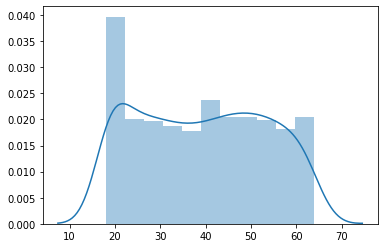

In [11]:
sns.distplot([data['age']])

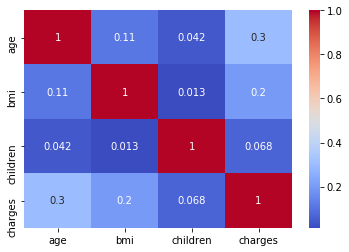

In [12]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

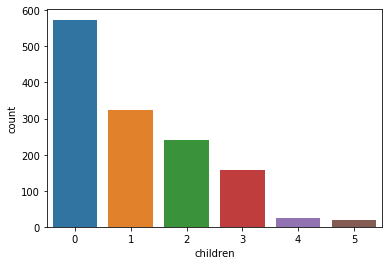

In [14]:
sns.countplot(data['children'])

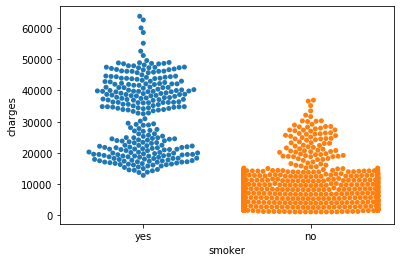

In [15]:
sns.swarmplot(x='smoker',y='charges',data=data)

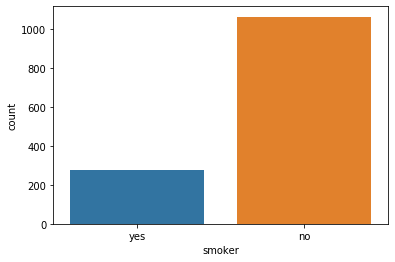

In [16]:
sns.countplot(data['smoker'])

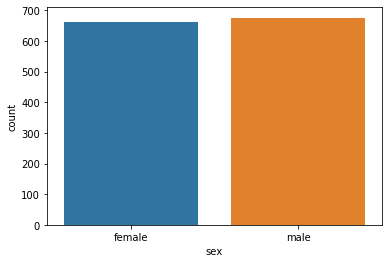

In [17]:
sns.countplot(data['sex'])

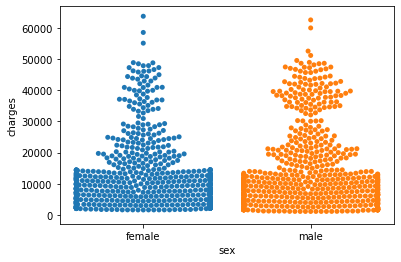

In [18]:
sns.swarmplot(x='sex',y='charges',data=data)

### Cleaning data

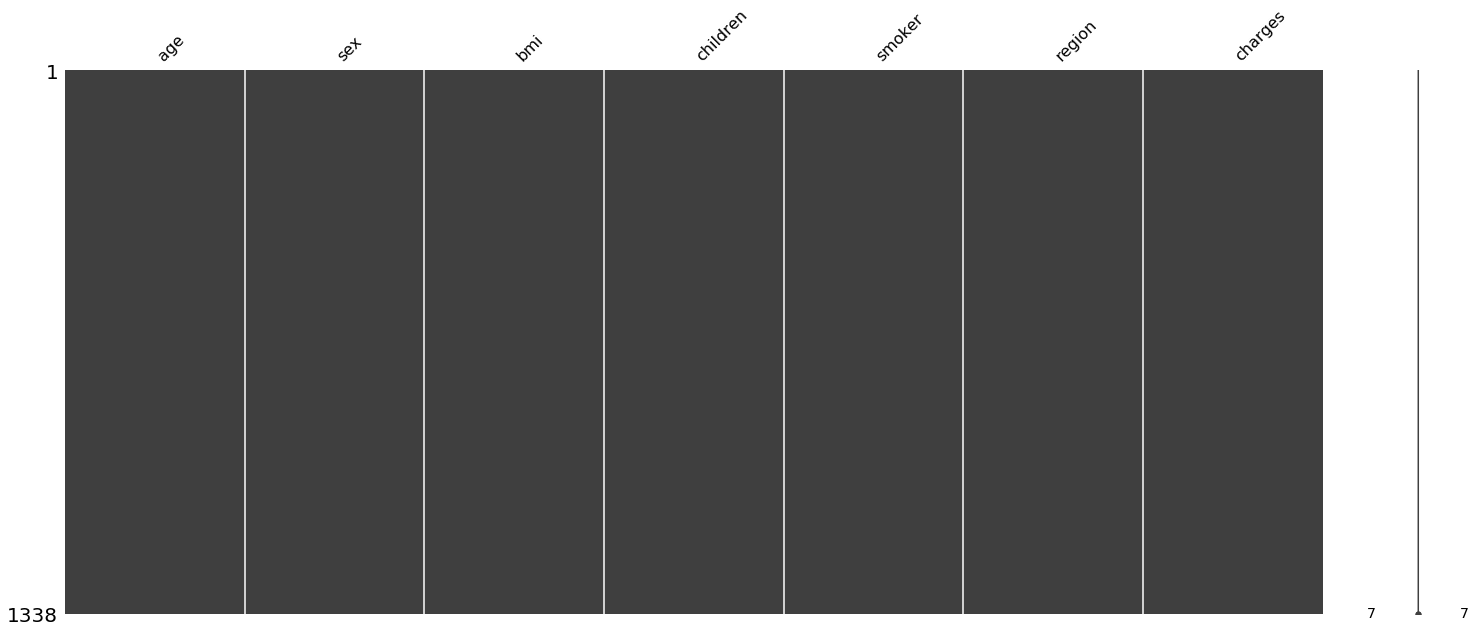

In [19]:
ms.matrix(data)

### Categorical Conversion

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
x = data.drop('charges',axis=1)
y = data['charges']

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x = ct.fit_transform(x)

In [24]:
print(x[0])

[1.0 0.0 19 27.9 0 'yes' 'southwest']


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-2])],remainder='passthrough')
x = ct.fit_transform(x)

In [26]:
print(x[0])

[0.0 1.0 1.0 0.0 19 27.9 0 'southwest']


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
x = ct.fit_transform(x)

In [28]:
print(x[0])

[0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 19 27.9 0]


### train_test_split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=1)

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [33]:
X_train = sc_x.fit_transform(X_train)

In [34]:
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train = sc_y.fit_transform(Y_train)

### Training the data

In [35]:
from sklearn.svm import SVR

In [36]:
regressor = SVR(kernel='rbf')

In [37]:
regressor.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the test dataset

In [38]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(X_test)))

### Results

In [39]:
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test),1)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(len(y_pred),1)

In [40]:
np.set_printoptions(precision=2)

In [41]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[ 3254.32  1646.43]
 [12507.96 11353.23]
 [10021.21  8798.59]
 [11632.63 10381.48]
 [ 2721.16  2103.08]
 [34060.96 38746.36]
 [10517.36  9304.7 ]
 [12441.65 11658.12]
 [ 3706.39  3070.81]
 [22686.5  19539.24]
 [13661.38 12629.9 ]
 [12870.14 11538.42]
 [ 7424.87  6338.08]
 [ 8100.69  7050.64]
 [ 2377.11  1137.47]
 [10005.91  8968.33]
 [ 4814.82 21984.47]
 [ 7406.02  6414.18]
 [13863.04 28287.9 ]
 [14328.98 13462.52]
 [10964.61  9722.77]
 [36847.71 40932.43]
 [ 9260.45  8026.67]
 [ 9686.06  8444.47]
 [ 3426.88  2203.47]
 [ 7602.68  6664.69]
 [ 9532.29  8606.22]
 [ 9467.72  8283.68]
 [ 6123.35  5375.04]
 [ 4250.1   3645.09]
 [12807.77 11674.13]
 [ 5699.38 11737.85]
 [22866.28 24873.38]
 [24720.95 33750.29]
 [23778.04 24180.93]
 [11075.63  9863.47]
 [37187.47 36837.47]
 [16984.75 17942.11]
 [13004.41 11856.41]
 [36113.4  39725.52]
 [ 4780.2   4349.46]
 [12853.12 11743.93]
 [11907.07 19749.38]
 [13476.51 12347.17]
 [ 6005.13  4931.65]
 [13508.98 30260.  ]
 [ 3050.6  27724.29]
 [30462.5  34

### R-squared score

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(Y_test,y_pred)

0.8455209995205955